In [98]:
#!/usr/bin/env python
"""mapper.py"""

'mapper.py'

In [99]:
import sys
from math import sqrt

get initial centroids from a txt file and add them in an array

In [100]:
def getCentroids(filepath):
    global x_list
    global y_list
    global x_initial
    global y_initial

    '''
    Mapper function:
        load in coordinates, Centroid, 
        Calculate the distances from each sample to each centroid point
        output relabeled cluster ID as key, Coordinates as value.
    
    '''
    with open('initial3points.txt') as a:
      initial = a.readlines()

    initial = list(map(lambda s: s.strip(), initial))
    x_initial = []
    y_initial = []
    for line in initial:
        Type = line.split(',')
        x = Type[0]
        y = Type[1]
        x_initial.append(x)
        y_initial.append(y)
    
    with open('data_points-1.txt') as f:
      lines = f.readlines()
      
    x_list = []
    y_list = []

    for line in lines:
        Type = line.split(',')
        x = Type[0]
        y = Type[1]
        x_list.append(x)
        y_list.append(y)
      
    x_initial = [float(x) for x in x_initial]
    y_initial = [float(x) for x in y_initial]
    x_list = [float(x) for x in x_list]
    y_list = [float(x) for x in y_list]

    centroids = []
    return centroids

In [101]:
k = 3

create clusters based on initial centroids

In [102]:
def createClusters(centroids):
  distance = []
  cluster = []
  for i in range (k):
    for j in range (len(x_list)):
      distancestep = sqrt((x_list[j] - x_initial[i])**2 + (y_list[j] - y_initial[i])**2)
      distance.append(distancestep)
      if(i == 2):
        if((distance[j] <= distance[j+len(x_list)]) and (distance[j] <= distance[j+2*len(x_list)])):
          cluster.append(0)
        elif((distance[j+len(x_list)] < distance[j]) and (distance[j + len(x_list)] <= distance[j+2*len(x_list)])):
          cluster.append(1)
        else:
          cluster.append(2)
  return cluster

On MapReduce (Mapper function), this would return the data points with the closest centroid (0, 1, or 2) attached with the data points.



**Calculating New centroids**

In [167]:
def NewClusters(Cluster_list):

  global cluster_change

  xsum0 = 0
  ysum0 = 0
  count0 = 0
  xsum1 = 0
  ysum1 = 0
  count1 = 0
  xsum2 = 0
  ysum2 = 0
  count2 = 0

  clusterx = []
  clustery = []
  cluster1x = []
  cluster1y = []
  cluster2x = []
  cluster2y = []


  for i in range (len(Cluster_list)):
    if(Cluster_list[i] == 0):
      xsum0 = xsum0 + x_list[i]
      ysum0 = ysum0 + y_list[i]
      count0 = count0 + 1
      clusterx.append(x_list[i])
      clustery.append(y_list[i])
    if(Cluster_list[i] == 1):
      xsum1 = xsum1 + x_list[i]
      ysum1 = ysum1 + y_list[i]
      count1 = count1 + 1
      cluster1x.append(x_list[i])
      cluster1y.append(y_list[i])
    if(Cluster_list[i] == 2):
      xsum2 = xsum2 + x_list[i]
      ysum2 = xsum2 + x_list[i]
      count2 = count2 + 1
      cluster2x.append(x_list[i])
      cluster2y.append(x_list[i])
  plt.scatter(clusterx, clustery)
  plt.scatter(cluster1x, cluster1y)
  plt.scatter(cluster2x, cluster2y)
  plt.scatter(x_initial, y_initial)
  plt.show()
  print("Figure")

  NewX0 = xsum0 / count0
  NewY0 = ysum0 / count0
  NewX1 = xsum1 / count1
  NewY1 = ysum1 / count1
  NewX2 = xsum2 / count2
  NewY2 = ysum2 / count2

  cluster_change = abs(x_initial[0] - NewX0) + abs(x_initial[1] - NewX1) + (x_initial[2] - NewX2) + abs(y_initial[0] - NewY0) +abs(y_initial[1] - NewY1) +abs(y_initial[2] - NewY2)
  print(cluster_change)

  NewX0 = str(NewX0)
  NewY0 = str(NewY0)
  NewX1 = str(NewX1)
  NewY1 = str(NewY1)
  NewX2 = str(NewX2)
  NewY2 = str(NewY2)

  NewCent = "{},{}\n{},{}\n{},{}".format(NewX0, NewY0, NewX1, NewY1, NewX2, NewY2)
  file='initial3points.txt' 
  with open(file, 'w') as filetowrite:
      filetowrite.write(NewCent)
  print(NewCent)

On MapReduce (Reducer Function), this will return the new centroid positions and will edit the existing text file.

This function will loop the map and reducer function until iterations or criteria are met

Rep #:
1


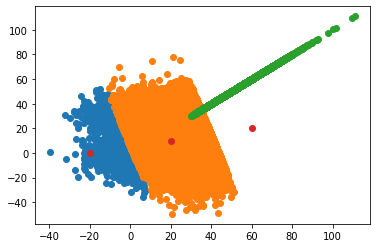

Figure
66.36393124597731
-5.023107495642601,7.627057400430873
22.329942178845986,8.570098761503392
50.00842125689307,50.008559180739525
Rep #:
2


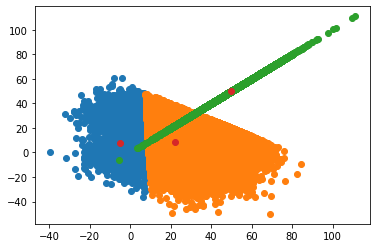

Figure
20.81336724784125
5.203921631310683,14.628419160149635
25.304345385250343,7.959548639054054
50.23950187477055,50.23966283093252
Rep #:
3


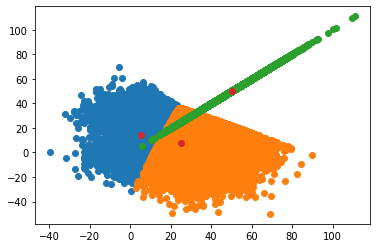

Figure
19.142292967911892
9.470686581209913,15.353282808662078
34.90350798645823,3.4080506213620763
50.27615037855158,50.2763150853139
Rep #:
4


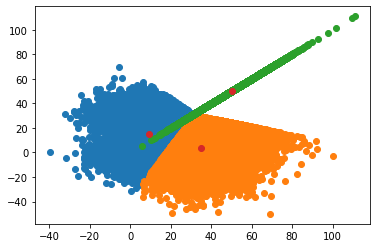

Figure
2.7857438685974127
9.938344167216961,15.114854780351601
36.418242945938786,3.8604656204257854
50.21989177993754,50.22006538819231
Rep #:
5


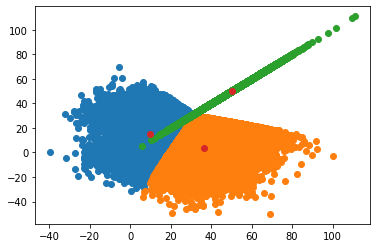

Figure
0.7108865278558043
9.97745489524424,15.07609305231439
36.70047392731942,4.193885451642344
50.211208291340625,50.211385617595106
Time:  47.65373420200012


In [170]:
import matplotlib.pyplot as plt
import timeit
start = timeit.default_timer()
i = 0
cluster_change = 100000000
while i < 10 and cluster_change > 1:
  centroids = getCentroids('initial3points.txt')
  Cluster_list = createClusters(centroids)
  print("Rep #:" )
  print(i + 1)
  NewClusters(Cluster_list)
  i = i + 1

stop = timeit.default_timer()
print('Time: ', stop - start)